最小化损失函数

![]()
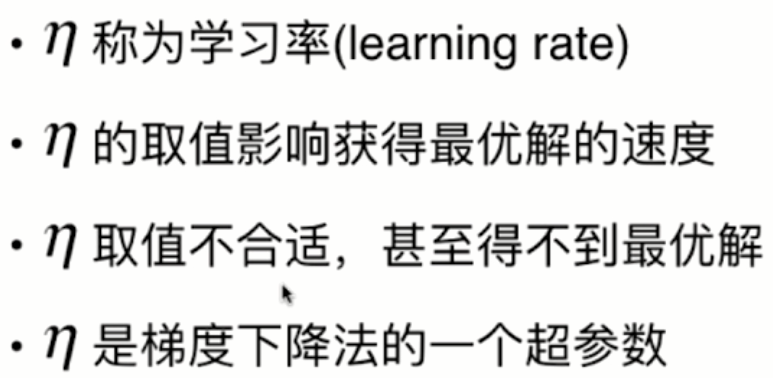

局部最优解；全局最优解

随机初始化起始点

### 多元线性规划中的梯度下降法

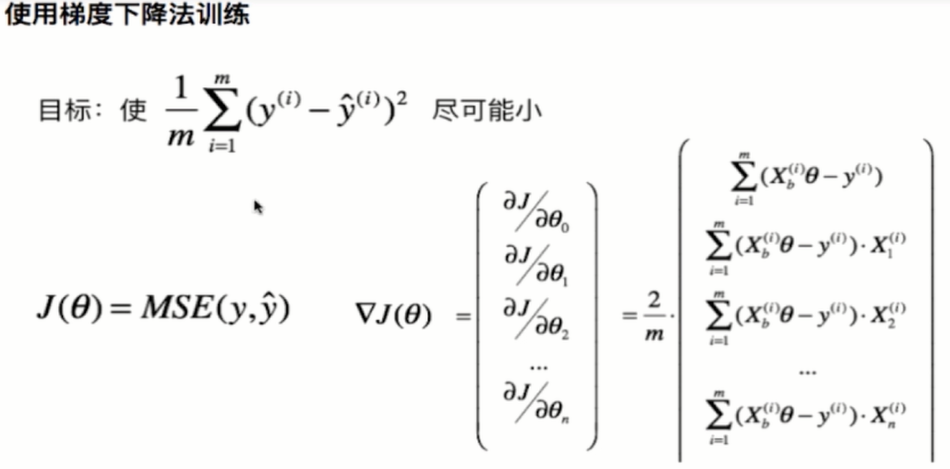

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
X = 2 * np.random.random(size = 100)
y = X * 3. + 4. + np.random.normal(size = 100)
X = X.reshape(-1,1)

In [3]:
print(X.shape)
print(y.shape)

(100, 1)
(100,)


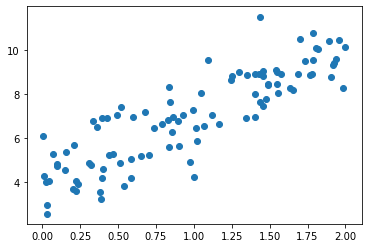

In [4]:
plt.scatter(X,y)
plt.show()

In [5]:
Xb = np.hstack( [np.ones( (len(X),1) ),X]  )
theta = np.zeros(Xb.shape[1])
eta = 0.01

In [6]:
def J(theta , Xb , y):
    try:
        return sum( (Xb.dot(theta) - y) ** 2 ) / len(y)
    except:
        return float('inf')

In [7]:
def dJ(theta , Xb , y):
    res = (Xb.dot(theta) - y).dot(Xb)
    return res * 2 / len(y)

In [8]:
def gradient_descent(theta ,Xb,y,eta,epsilon = 1e-8):
        iter_ = 0
        while iter_ < 1e6:
            gradient = dJ(theta , Xb , y)
            last_theta = theta
            theta = theta - eta * gradient

            if( abs( J(theta , Xb , y)  - J(last_theta , Xb , y)) < epsilon):
                print(theta)
                break

In [9]:
gradient_descent(theta,Xb,y,eta)

[4.02145786 3.00706277]


#### 使用真实数据

对比 梯度下降和线性回归

In [10]:
from sklearn import datasets
boston = datasets.load_boston()

In [11]:
X = boston.data
y = boston.target 

X = X[y<50]
y = y[y<50]

In [12]:
from sklearn.model_selection import train_test_split
X_train  , X_test  , y_train  , y_test = train_test_split(X , y, random_state=666)

In [13]:
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()

In [14]:
LR1.fit(X_train,y_train)
LR1.score(X_test,y_test)

0.8009390227581041

导入之前写的库，使用梯度下降

In [15]:
from LR import my_LR
LR2 = my_LR()

In [16]:
LR2.fit_gd(X_train,y_train)

C:\Users\hyh\anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\Users\hyh\Desktop\machinelearning\LR.py:36: RuntimeWarning: overflow encountered in square
  return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
C:\Users\hyh\Desktop\machinelearning\LR.py:52: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
C:\Users\hyh\Desktop\machinelearning\LR.py:41: RuntimeWarning: overflow encountered in multiply
  return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)


In [17]:
LR2.coef_

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

数据溢出，是因为真实数据差距较大，设定的学习率可能对于某些数据来说太大了，导致溢出

减小学习率

In [18]:
LR2.fit_gd(X_train,y_train  , eta = 1e-6 )

In [19]:
LR2.score(X_test , y_test)

0.30334492611229424

0.3是因为降低学习率，且循环次数较低造成的，加大喜欢次数后

In [20]:
LR2.fit_gd(X_train,y_train  , eta = 1e-6 , n_iters = 1e6)

In [21]:
LR2.score(X_test , y_test)

0.737942001474466

可以发现准确率上升不少，我们在接着将数据归一化

In [22]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
X_train_standard = standardScaler.transform(X_train)

In [24]:
LR3 = my_LR()

In [25]:
LR3.fit_gd(X_train_standard,y_train)

In [26]:
X_test_standard = standardScaler.transform(X_test)

In [27]:
LR3.score(X_test_standard,y_test)

0.8009270105386641

可见归一化的重要性

### 随机梯度下降

随机选取一个进行计算，减少计算量

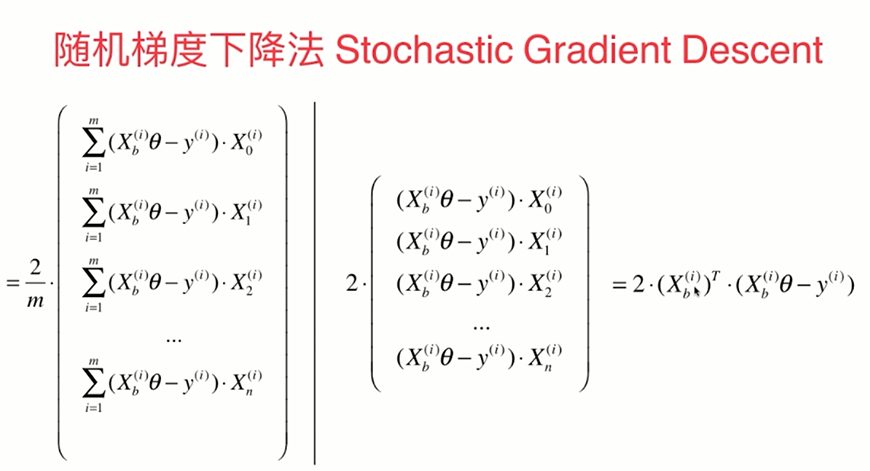

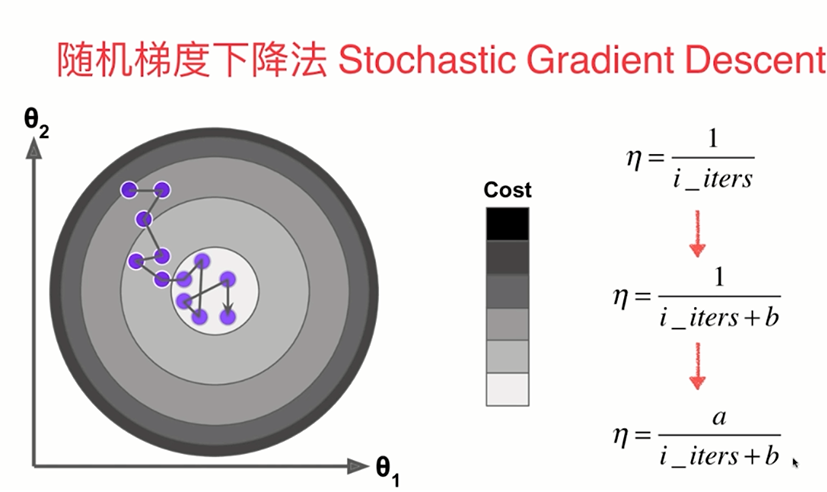

为了保证，学习率递减，模拟退火   

In [28]:
import numpy as np

In [29]:
np.random.seed=666
x = np.random.normal(size = 100000)
y = 4. * x + 3. + np.random.normal(0 , 3 , size=100000)
x = x.reshape(-1,1)


In [30]:
def dJ_s(theta , Xb_i , y_i):
  
    return np.array(Xb_i.dot(theta) - y_i).dot(Xb_i) * 2

In [31]:
def gradient_descent_stochastic(theta ,Xb,y,n_iters = 1e4):
    t0 = 5
    t1 = 50
    
    def  learning_rate(t):
        return t0 / (t1 + t)
    init_theta  =  theta
    for i in range(int(n_iters)):
        rand_i = np.random.randint(len(Xb))
        gradient = dJ_s(init_theta , Xb[rand_i] , y[rand_i]  )
        init_theta = init_theta - learning_rate(i) * gradient
        
    return init_theta

In [32]:
LR4 = my_LR()

In [33]:
%%time
Xb = np.hstack( [np.ones( (len(x),1) ),x]  )
theta = np.zeros(Xb.shape[1])
eta = 0.01
gradient_descent(theta,Xb,y,eta)

[3.00590902 4.00776602]
Wall time: 7.51 s


使用随机梯度下降

In [34]:
%%time
Xb = np.hstack( [np.ones( (len(x),1) ),x]  )
theta = np.zeros(Xb.shape[1])
eta = 0.01
gradient_descent_stochastic(theta,Xb,y)

Wall time: 72.8 ms


array([3.04778168, 3.97538187])

可见使用随机梯度下降可以大大缩短时间

### sklearn实现

In [38]:
from sklearn.linear_model import SGDRegressor

In [39]:
X = boston.data
y = boston.target 

X = X[y<50]
y = y[y<50]


In [40]:
from sklearn.model_selection import train_test_split
X_train  , X_test  , y_train  , y_test = train_test_split(X , y, random_state=666)

In [43]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [45]:
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_standard,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [46]:
sgd_reg.score(X_test_standard,y_test)

0.7975700494888258

效果并不理想，将遍历次数增加

In [55]:
sgd_reg = SGDRegressor(n_iter_no_change=200)
sgd_reg.fit(X_train_standard,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=200, penalty='l2', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
sgd_reg.score(X_test_standard,y_test)

0.8009223633939891

### 梯度调试

我们不能保证，求出来的导数函数是对的，需要有对照

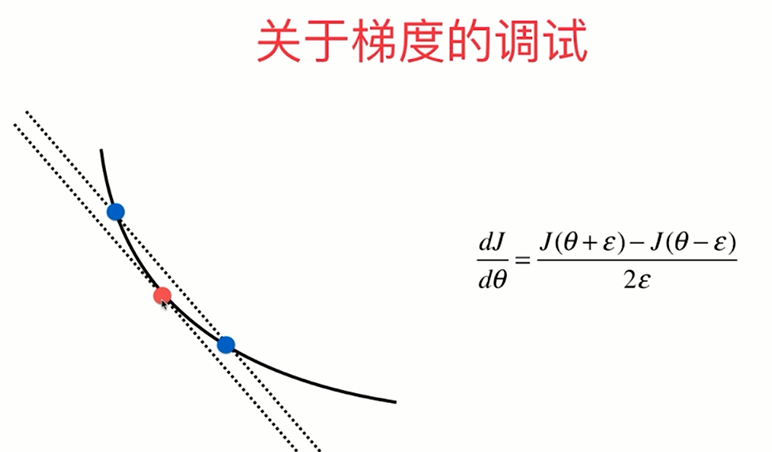

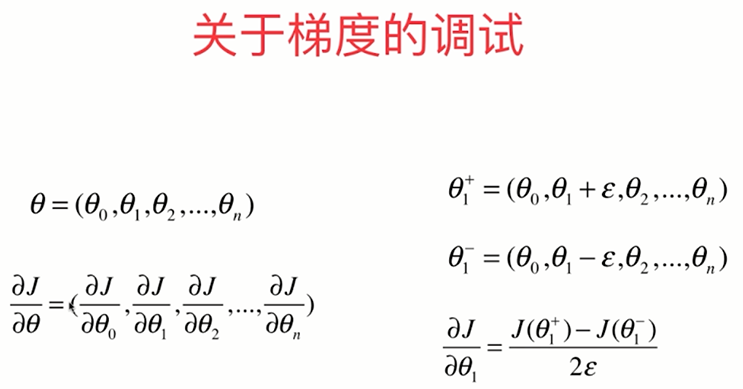

通过去两个极度相近的点，求导数，并进行对比

In [58]:
def  dJ_debug(theta , Xb , y , epsilon = 0.01):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta1 = theta.copy()
        theta1[i] += epsilon
        theta2 = theta.copy()
        theta2[i] -= epsilon
        res[i] = ( J(theta1 , Xb , y) - J(theta2 , Xb , y) ) / (2 * epsilon)
    return res

In [61]:
X = 2 * np.random.random(size = 100)
y = X * 3. + 4. + np.random.normal(size = 100)
X = X.reshape(-1,1)

In [70]:
Xb = np.hstack( [np.ones( (len(X),1) ),X]  )
theta = np.zeros(Xb.shape[1])
eta = 0.01

In [71]:
dJ_debug(theta , Xb , y)

array([-14.95592148, -18.37115162])

In [72]:
gradient_descent(dJ_debug(theta , Xb , y) , Xb , y , eta)

[4.32589206 2.84576233]


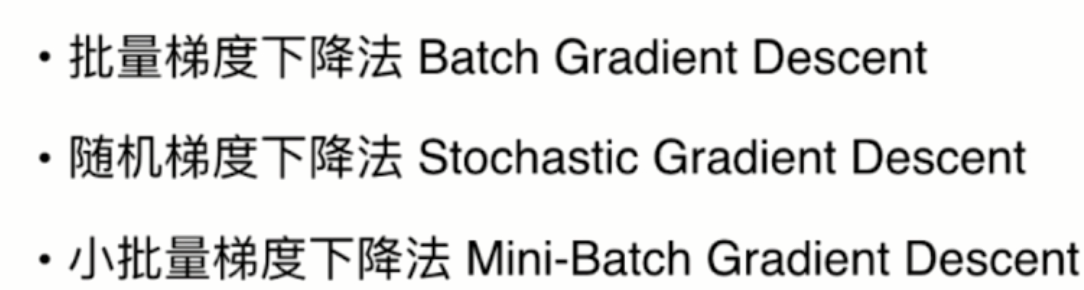

第一个 稳定但是慢

第二个  快但是不稳定

第三个 结合以上两者，较优